In [1]:
#| echo: false

import os

def delete_file(file_name, verbose=False):
    """
    Deletes the specified file if it exists.
    
    Parameters:
    - file_name (str): The name of the file to delete.
    """
    try:
        os.remove(file_name)
        if verbose: print(f"{file_name} has been deleted successfully.")
    except FileNotFoundError:
        if verbose: print(f"{file_name} does not exist.")
    except Exception as e:
        if verbose: print(f"An error occurred: {e}")

delete_file('_variables.yml')

def append_to_file(file_name, text, verbose=False):
    """
    Appends the given text to the specified file.
    
    Parameters:
    - file_name (str): The name of the file to which text should be appended.
    - text (str): The text to append to the file.
    """
    try:
        with open(file_name, 'a') as file:  # Open the file in append mode
            file.write(text + '\n')         # Append the text and add a newline
        if verbose: print(f"Text appended to {file_name} successfully.")
    except Exception as e:
        if verbose: print(f"An error occurred: {e}")


In [2]:
# Import Pandas, Seaborn, and related
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import requests

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from scipy.stats import chi2_contingency

from IPython.display import Markdown, display

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Set Seaborn context
sns.set_context('paper')

# Preliminary data inspections
df0 = pd.read_csv('Lakes_Original.csv')
with open('_variables.yml', 'a') as f:
    # Write number of observations for later reference
    f.write(f'number_of_lakes: {df0.shape[0]}\n')
    # Write number of records with 0°, 0° Latitude and Longitude
    f.write(f'zero_coords_count: {df0[df0["Latitude"] == 0].shape[0]}\n')

In [3]:
#| echo: false
from IPython.display import Markdown
Markdown(f"""::: {{.callout-note}}
As provided by the Wisconsin Department of Natural Resrouces 
the data for this project includes {df0.shape[1]} columns of information 
from {df0.shape[0]} lakes. [@wisconsin_dnr_lake_pages].
:::""")

::: {.callout-note}
As provided by the Wisconsin Department of Natural Resrouces 
the data for this project includes 14 columns of information 
from 16711 lakes. [@wisconsin_dnr_lake_pages].
:::

# Introduction

A common question faced by organizational executive leadership (the c-suite), academic researchers, industry professionals, students, and others regarding data science methods or models is what do these methods and models accomplish. Closely related is what does a data scientist do? Or, how does a data scientist provide value to an organization? These are important questions becuase as @raschka2019python point out large companies "heavily invest in machine learning research applicaionts for *good reason*" (p. xiii) (emphasis added). This paper presents a novel response to those questions.

I write this paper for at least four audiences who all have a common interest. 

- First for organizational leaders who may not seek to employ these methods on their own but who have an interest in developing or acquiring talent who can employ these methods.
- Second, for academic researchers who are situated in universities, think takes, or research institues and who are often funded by private or government research grants.
- Third, for industry professionals who may work in for-profit, not-for-profit, or governmental organizations.
- And fourth for students, at any level of study but who may be newer to the exploration of data science.

These audiences share a common interest in understanding the practical utility of data science methods and models. Each of thease audiences have a need to understand how data science can offer highly reproducible approaches, results, insights, utility, and other forms of valuable output. To assist in meeting these common objectives I also distribute with this paper its raw markdown, Python code, Jupyter notebooks, and data sources.

This paper presents an example of work that might have been performed by a data scientist who is working to support policy makers as they oversee the maintenance of public accommodations on lakes located across the State of Wisconsin. This paper's example does not put a model into production because the contexts do not demand a model in production. 

The guiding analytical question and goal for this paper is to use data science as a means to explore which lakes have public services such as a park, beach, or boat landing but perhaps should not. Conversely also to explore which lakes should have public services such as a park, breach, or boat landing but perhaps do not.

Those that have a service but perhaps should not I will describe as overserviced while those that do not have service but perhaps should I will describe as underserviced.

# Literature Review

This literature review serves to provide an overview of three important contexts that inform this paper's analytical approach including the policy context, the environmental/limnological/geologic context, and the practice of data science.

## Policy Context

The goal of this project is to inform multiple autorities and decision makers as they work in collaboration to make and implement public policy. This context, where also multiple sources of authority conflict in their interests, may benefit from an analysis that identifies underserviced or overserviced lakes.

The management of Wisconsin’s lakes is a shared responsibility that involves state, local, and federal authorities, each contributing unique roles and expertise to ensure sustainable and effective oversight. @garn2003why also point to lake management associations and lake districts as a source of authority, management, and oversight.

At the state level, the Wisconsin Department of Natural Resources (WDNR) serves as a key authority, providing a framework for lake management. The WDNR’s Lake Modeling Suite offers tools for assessing lake health and predicting management strategy outcomes, while the Surface Water Integrated Monitoring System (SWIMS) serves as a comprehensive database for water quality and ecological data [see @wisconsin_dnr_lake_modeling_suite; and @wisconsin_dnr_swims].  These resources are classic examples of those that data science practitioners would reference in executing a study with this study's analytical goals.

::: {.callout-note} 
The Wisconsin Department of Natural Resources' Surface Water Integrated Monitoring System (SWIMS) exemplifies the kind of data that data scientists often encounter in applied, policy-relevant contexts. Like many administrative and environmental datasets, SWIMS is rich with information but also characteristically messy. Analysts working with these or similar data must address missing values and inconsistencies in field formats, among other oddities. For example, some columns store numbers as strings due to the presence of unit labels (such as "43 FEET"), while others contain values outside the expected or valide ranges. Data of this kind demands both exploration and transformation before meaningful analysis can begin.
:::

The state does not operate alone [@Thornton2013Stakeholder]. Local city and county authorities play a part in lake management, particularly in implementing localized policies that address specific community needs including whether to establish a park, beach, or boat access. For example, local governments often plan roads that would service the accommodations and oversee zoning law that would regulate which manner of development may be allowed in a given area. 

Federal authorities also contribute to the management of Wisconsin’s lakes through regulatory and funding mechanisms. The federal Environmental Protection Agency (EPA) establishes water quality standards and provide financial support for restoration projects under the Clean Water Act [@Elbakidz2021hetero] and similar initiatives. Additionally, federally funded programs contribute to the preservation of critical habitats and mitigation of invasive species, which are pressing concerns for many of Wisconsin’s lakes.

In addition to state, local, and federal authorities, tribal governments play a role in the management and preservation of Wisconsin’s lakes [@Waller2018Ecology; and @Spear2020Application]. Many of Wisconsin’s lakes are located on or near tribal lands, and the sovereign rights of indigenous nations give them a unique and essential role in overseeing natural resources. Tribal authorities often have deep, place-based knowledge and cultural ties to these waters, which guide stewardship practices [@Chief2014Engaging].

The overlapping jurisdictions and collaborative efforts among these levels of government underscore the complexity of lake management. For data scientists working in this domain, understanding the policy context is crucial for framing analytical questions, interpreting data, and ensuring that findings are actionable for stakeholders across all levels of governance. Because this analysis may inform policy decisions across various levels of government (state, local, tribal), the output of this analysis may be useful by many.

## Environmental Limnological Geologic

As a study of Wisconsin lakes, this work intersects at least three major academic and scientific domains: environmental science, limnology, and geology. In practice a data scientist would heavily rely on literature and also consultations with experts who study, know, and understand these domains. Knowledge from literature and from consultation is commonly called "domain knowledge" among data science practitioners [@nelson2023confident]. The ability to contextualize data is further emphasized by [@carvalho2024new], who notes that collaboration with domain experts is vital throughout the data science process to ensure that the results are relevant and actionable. 

According to @bendor2013modeling the following factors figure into park development: 

- Road and highway access: The accessibility of a lake by road or highway.
- Proximity to public utilities: The availability of public utilities including electricity, septic, sewer, and similar.
- Size and scope of the park: Larger parks with more complex infrastructure will take longer to plan and build.
- Land acquisition: Acquiring land can be time-consuming, especially if it involves negotiations, legal proceedings, or eminent domain.
- Environmental impact assessment: Environmental reviews and permits can add significant time to the process.
- Funding: Securing funding for land acquisition, design, and construction can be a major hurdle and can delay the project.
- Public input and approval: Public hearings and comment periods can extend the timeline, especially if there are significant concerns or opposition.
- Construction timeline: The actual construction phase can vary depending on the complexity of the project, weather conditions, and other factors.

Each of these domains contributes essential perspectives to understanding the complex systems governing lake ecosystems and their management.

::: {.callout-note}
Domain knowledge refers to the specialized understanding and expertise within a particular field or subject area. In the context of this study, domain knowledge spans environmental science, limnology, and geology—fields that provide the essential insights needed to analyze and interpret data about Wisconsin lakes. It allows data scientists to frame relevant questions, choose appropriate methodologies, and ensure that their findings are both accurate and actionable for decision-makers. [@nelson2023confident].
:::

The environmental domain encompasses the broader ecological interactions affecting Wisconsin lakes. This ecology includes factors such as land use, agricultural, water quality, and climate changes. Limnology, the study of inland waters, focuses specifically on the biological, chemical, and physical characteristics of lakes and their surrounding environments. The geologic domain provides insights into the underlying structure and formation of Wisconsin’s lake basins.

The interplay of environmental, limnological, geologic (and other) factors defines the unique character of each lake. Effective policy and management decisions require an integrated understanding of these domains, supported by data-driven insights. By combining these perspectives, this study aims to model how a data science practitioner's work necessarily involves reference to knowledge not specific to data science in collaboration with others.


## The Data Science Process

> The goal of generating new knowledge is at the heart of all scientific disciplines, including data science. It is about finding patterns and relationships in the data that can help us make better decisions or solve complex problems. [@nelson2023confident, p 67]

For a range of reasons data sciecne is also more "experimental" in its approaches [@Martins2021earlyprediction] than more traditional inferential statistical work. For example, according to @Martins2021earlyprediction in regards to model or algorithm selection the best machine learning technique is dependent "on the dataset and on the formulation of the problem" (p. 172). According to @Breiman2001culture who described more traditional approaches as "data modeling" and the more experimental approahces as "algorithmic" modeling a key distinction between these two approaches is that for data modeling the main metric as to what may constitute a "good" model is a look at goodness of fit while the key metric for algorithmic modeling is predictive accuracy.

@Breiman2001culture defends so-called algorithmic modeling culture by suggesting that the focus among those in the data modeling culture have brewed an environment which has "lead to irrelevant theory," "questionable scientific conclusions," limited or stymied the use of "more sutiable agorithmic models," and prevented work "on exciting new problems" (p. 299-200).

A focus on accuracy is not a trivial distinction. The distiction underscores 
the practical utility of what @Breiman2001culture refers to as algorithmic modeling in addressing complex problems. This paper’s research question, treated as a thought experiment, highlights the utility of prioritizing accuracy over measures like goodness of fit. Specifically, our goal is to produce two actionable lists of lakes:

1. **Overserviced Lakes** Lakes that currently have public accommodations but perhaps should not. These will be lakes that our model incorrectly predicts as lacking public accommodations.
2. **Underserviced Lakes** Lakes that lack public accommodations but perhaps should have them. These will be lakes that our model incorrectly predicts as having public accommodations.

Thus, given this paper's analytical question the results of interest will be incorrect predictions. The flexibility of data science and it's algorithmic modeling culture permits a tailored approach finely tuned based on the needs of policymakers. 

For instance, if policymakers prefer longer lists of lakes to consider, we can adjust the model through parameter tuning and feature selection to increase error rates, thereby expanding the lists. Conversely, if shorter, more focused lists are desired, we can optimize the model to reduce error rates. 

Additionally, as this paper does, we can refine our approach by analyzing the probability of class membership rather than relying solely on binary predictions. A close look at probabilities permits further customization of list lengths to better meet policy objectives.

In order to solve the complex problem of deciding which lakes need more services and which lakes may have services but not need them, this paper explores patterns and relationships in Wisconsin Department of Natural Resources (WDNR) data by following the eight step data science process as documented by @nelson2023confident and reproduced here in @fig-data-sicence-process. The paper's new knowledge will be a list of lakes that are potentially overserviced along with another list of lakes that may be underserviced.

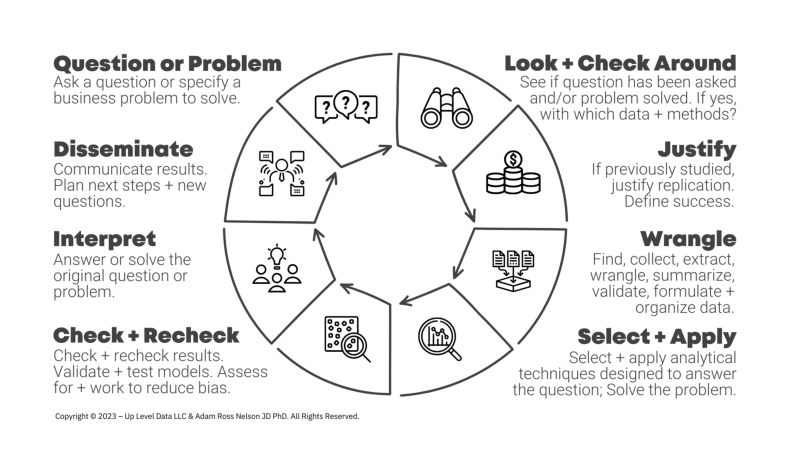

In [4]:
#| label: fig-data-sicence-process
#| fig-cap: "The data science process as published in *Confident Data Science* (Nelson, 2023)."
#| fig-num: true

# Load image
img = mpimg.imread('process.png') 

# Set the figure size (width, height in inches)
plt.figure(figsize=(10, 10 * .5625))

# Display image
plt.imshow(img)
plt.axis('off');

This process, as illustrated in @fig-data-sicence-process starts at the upper left under the heading "Question or Problem" and moves clockwise as an interative cycle as it also further consists of the following:

1. **State an analytical question or a business problem to solve.**
2. **Look + check around.** Explore if the question has been answered or if the problem has been solved. Also look to see what other similar questions or problems have been studied. Identify which methods have, or have not, been successful in the past. Also identify potential data sources.
3. **Justify the work.** Examine the scope of the question or the problem. Determine how answering the question or solving the problem provides value. Determine what additional revenues or efficiencies an answer to the question or a solution to the problem may bring. If the question has previously been answered or the problem previously solved decide if now is a good time to replicate the work (Is there now new data? Or, are there now new methods available?)
4. **Wrangle the data.** This involves finding, collecting, extracting, summarizing, validating, formulating, organizing, reshaping, coding, and recoding the data.
5. **Select and apply a method.** Determine which methods will best answer the analytical question or solve the business problem and then apply those methods.
6. **Check and recheck.** It is important to look back at this stage. Examine if the analytical question or business problem have been properly stated. Determine if there is new information that may have been missed, discounted, or overlooked in earlier stages. This stage may often involve seeking external input on in-progress work.
7. **Interpret the results.** Here the process involves answering the original analytical question or proffering a solution to the specified business problem.
8. **Dissemination.** The last stage involves either, or both disseminating the results or putting them into production.


## Dissemination, Not Production

This paper's example does not exemplify putting a model into production. Below is further explanation as to why putting a model into production is not appropriate for this paper, and indeed the same is also true many papers using data science's algorithmic mode of science.

This paper's environmental/limnological/geologic contexts are a primary reason why the work here does not involve putting a model into production. A model in production is useful when a business systems, often driven by software systems, require a prediction that can serve as a tool in making a decision. Or in contexts when information is frequently or rapidly changing and the use case calls for using a prediction as a recommendation or an automated decision.

::: {.callout-note}
A model in production is most useful in environments where predictions must be made repeatedly in response to rapidly changing data. These contexts often involve automated systems or decision-making pipelines—such as in weather forecasting, energy grid optimization, or real-time environmental monitoring—where data streams update frequently, and predictions must adapt continuously. For example, a model deployed in production for natural resources management might monitor streamflow or rainfall to inform automated alerts for flood risks or fire danger. In such cases, real-time data ingestion and dynamic model retraining are essential to the utility of the prediction.
:::

A description of Wisconsin's lakes from over fourty years ago remains as true today as it was when first published. @lillie1983limnological describe the typical Wisconsin lake as "natural in origin, equally likely to be of seepage or drainage and stratified or mixed in basic lake type and probably located in the northern half ot the state" (p. N).

In the case of Wisconsin's lakes it is not often that a new lake will appear on the map. According to data utilized in this paper's analysis from the WDNR there are {{< var number_of_lakes >}} lakes located throughout the state of Wisconsin. The number of lakes has for decades frequently been reported at a rounded 15,000 (@lillie1983limnological). The number of lakes in Wisconsin, or any geographic region, does not change often. Thus, in this case it is sufficient to train and test a model once on the existing data (which we do not expect to change often).

# Data + Method

As discussed above the method for this project involves a one-time analysis. Specifically the output will be a list of lakes that do have public accommodations but are more similar to lakes that do not have public accommodations (underserviced). A companion output will be a list of lakes that do not have public accommodations but that are more similar to lakes that do (overserviced).

Here I first discuss the data and then also the method that will produce a list of lakes that should be further considered for the addition of one or more public accommodation and a list of lakes that might benefit from public accommodation closure or retirement.

## WDNR Data {#sec-wdnr-data}

The WDNR publishes the data for this analysis [@wisconsin_dnr_lake_pages]. The WDNR supports this data, uses it for a full range of purposes [@wisconsin_dnr_swims], and it receives contributions from "citizen science" initiatives [@kretschmann2011citizen].

In [5]:
df0.iloc[5194]

Waterbody ID Code (WBIC)                                              1605800
Lake Name                                                      Sevenmile Lake
Size (Acres)                                                            518.0
Official Max Depth                                                    43 FEET
Official Mean Depth                                                   19 FEET
Latitude                                                            45.879899
Longitude                                                          -89.051678
Public Landing                                                            Yes
Public Beach                                                               No
Public Park                                                               Yes
Fish Present                Musky, Panfish, Largemouth Bass, Smallmouth Ba...
Lake Type                                                            DRAINAGE
Water Clarity                                                   

In [6]:
characteristic_lake_id = 5194

with open('_variables.yml', 'a') as f:
    # Save characteristic lake name
    f.write(f'char_lake_name: {df0.iloc[characteristic_lake_id]["Lake Name"]}\n')
    # Save characteristic lake size
    f.write(f'char_lake_size: {df0.iloc[characteristic_lake_id]["Size (Acres)"]}\n')
    # Save characteristic lake max depth
    f.write(f'char_lake_max_depth: {df0.iloc[characteristic_lake_id]["Official Max Depth"].lower()}\n')
    # Save characteristic lake mean depth
    f.write(f'char_lake_mean_depth: {df0.iloc[characteristic_lake_id]["Official Mean Depth"].lower()}\n')
    # Save characteristic lake latitude
    f.write(f'char_lake_latitude: {df0.iloc[characteristic_lake_id]["Latitude"]}\n')
    # Save characteristic lake longitude
    f.write(f'char_lake_longitude: {df0.iloc[characteristic_lake_id]["Longitude"]}\n')
    # Save characteristic lake county
    f.write(f'char_lake_county: {df0.iloc[characteristic_lake_id]["County"]}\n')

A characteristic lake in this data is {{< var char_lake_name >}} which is about {{< var char_lake_size >}} in acres, up to {{< var char_lake_max_depth >}} deep, (with a mean depth of {{< var char_lake_mean_depth >}}), and located at {{< var char_lake_latitude >}} latitude by {{< var char_lake_longitude >}} longitude in {{< var char_lake_county >}} counties.

In [7]:
#| echo: false

Markdown(f"""This WDNR data features a high rate of missing data. 
A total of {(df0.isna().sum() != 0).sum()} of the data's {df0.shape[1]}
columns contain some missing data. 
@fig-missing-data displays missing data as bright lines in a heatmap.
@tbl-missing-data shows the data's 
{(df0.isnull().mean() > 0).sum()} columns with at least some missing data.
During data preparation, missing information for the 
`lake type`, and `water clarity` will be
replaced with a new "missing" category. When creating
a dummy array to represent the `fish present` column records
with missing data will be represented by a set of `0` values.
Missing data in the `Official Max Depth` column will be replaced with
data that is a function of `Size (Acres)`. According to @lillie1983limnological [p. 4]
a Wisconsin lake's mean depth can be estimated as half of its maximum
depth. Accordingly, missing information in the `Official Mean Depth`
column will be replaced with 50% of each lake's maximum depth.
""")

This WDNR data features a high rate of missing data. 
A total of 6 of the data's 14
columns contain some missing data. 
@fig-missing-data displays missing data as bright lines in a heatmap.
@tbl-missing-data shows the data's 
6 columns with at least some missing data.
During data preparation, missing information for the 
`lake type`, and `water clarity` will be
replaced with a new "missing" category. When creating
a dummy array to represent the `fish present` column records
with missing data will be represented by a set of `0` values.
Missing data in the `Official Max Depth` column will be replaced with
data that is a function of `Size (Acres)`. According to @lillie1983limnological [p. 4]
a Wisconsin lake's mean depth can be estimated as half of its maximum
depth. Accordingly, missing information in the `Official Mean Depth`
column will be replaced with 50% of each lake's maximum depth.


<Axes: >

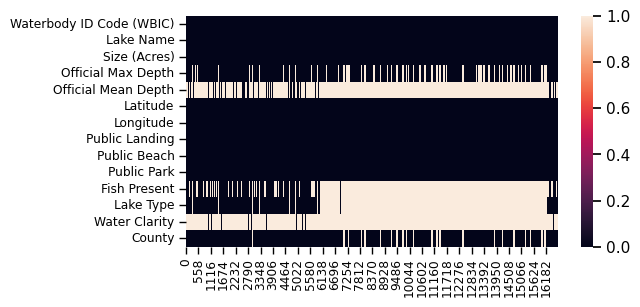

In [8]:
#| label: fig-missing-data
#| fig-cap: "Heat map showing missing data. Bright lines represent a mising data cell."
#| fig-num: true

fig, ax = plt.subplots(figsize=(6, 3))
sns.set_context('notebook')
sns.heatmap(df0.transpose().isna())

In [9]:
#| label: tbl-missing-data
#| tbl-cap: "The proportion of missing entries in each column. Columns with no missing data not shown."
#| tbl-num: true

# Find the proportion of missing entries in each column.
missing_table = pd.DataFrame(
    df0.isnull().mean(),
    # Descriptively name the column
    columns=["Proportion of Missing Data In Each Column"])

# Filter to columns with missing data
missing_table = missing_table[
    missing_table['Proportion of Missing Data In Each Column'] > 0]

# Add more descriptive text to the table columns
missing_table[
'Proportion of Missing Data In Each Column'] = missing_table[
'Proportion of Missing Data In Each Column'].apply(
    lambda x: f'{round(x * 100, 2)} % Missing Records')

missing_table

,Proportion of Missing Data In Each Column
Official Max Depth,19.94 % Missing Records
Official Mean Depth,90.18 % Missing Records
Fish Present,70.76 % Missing Records
Lake Type,62.24 % Missing Records
Water Clarity,96.23 % Missing Records
County,8.71 % Missing Records


Below @fig-wisconsin-lakes-mapped shows the geographic distribution of lakes across Wisconsin. The lakes with a public beach, park, or boat landing show as dark `x` marks while the lakes with no public beach, park, or boat landing show as small `o` marks. Consistent with estimations from @lillie1983limnological we see in @fig-wisconsin-lakes-mapped that 50% of Wiscosin's lakes are above north 45.5 degress latitude. 

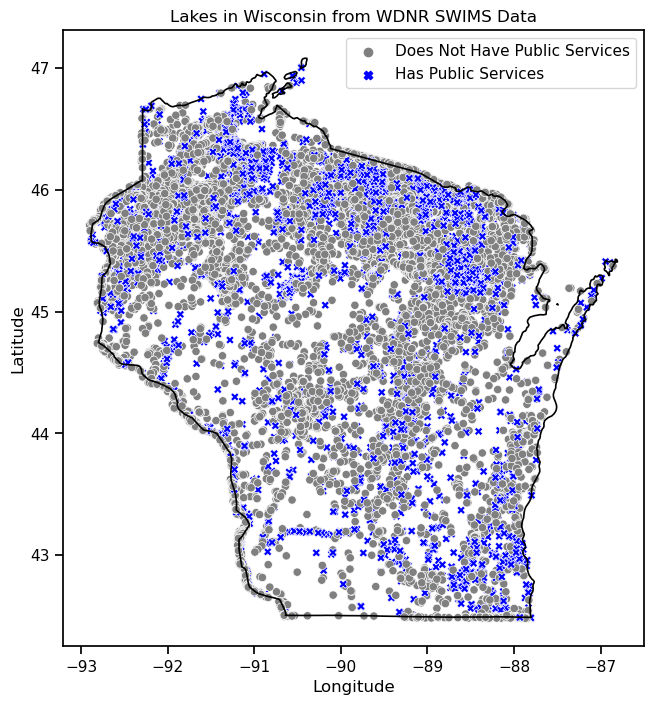

In [10]:
#| label: fig-wisconsin-lakes-mapped
#| fig-cap: "A map showing the location of each lake in these data."
#| fig-num: true

# Function to fetch and save Wisconsin GeoJSON if not present
def fetch_wisconsin_geojson(local_path="wisconsin.geojson", verbose=False):
    if not os.path.exists(local_path):
        if verbose: print(f"{local_path} not found. Downloading...")
        web = 'https://raw.githubusercontent.com'
        path = 'glynnbird/usstatesgeojson/master/'
        file = 'wisconsin.geojson'
        response = requests.get(web + path + file)
        if response.status_code == 200:
            with open(local_path, 'wb') as file:
                file.write(response.content)
            if verbose: print(f"Downloaded and saved {local_path}.")
        else:
            fetch_error = f"Wisconsin GeoJSON fetch failed. "
            fetch_error += f"HTTP status code: {response.status_code}"
            raise ValueError(fetch_error)
    else:
        if verbose: print(f"Using local copy of {local_path}.")
    return gpd.read_file(local_path)

# Load Wisconsin GeoJSON
wisconsin = fetch_wisconsin_geojson()

# Clean lake location data. Longitude sometimes stored as positive values.
lake_data = df0[['Latitude','Longitude',
                'Public Landing','Public Beach',
                'Public Park']].copy(deep=True)
lake_data['Longitude'] = [l if l < 0 else l * -1 for l in lake_data['Longitude']]
# Remove records recording 0 Latitude
lake_data = lake_data[lake_data['Latitude'] > 0]

# Make hue for color code
lake_data['Landing, Beach, or Park'] = lake_data[
    ['Public Landing','Public Beach','Public Park']].max(axis=1)

lake_data['Landing, Beach, or Park'] = [
    'Has Public Services' if i == "Yes" 
    else "Does Not Have Public Services" for i in lake_data['Landing, Beach, or Park']]

# Convert lake data to GeoDataFrame
gdf_lakes = gpd.GeoDataFrame(
    lake_data, geometry=gpd.points_from_xy(lake_data.Longitude, lake_data.Latitude)
)

# Ensure both GeoDataFrames use the same CRS
gdf_lakes.set_crs(epsg=4326, inplace=True)
wisconsin = wisconsin.to_crs(epsg=4326)

# Plotting
fig, ax = plt.subplots(figsize=(10, 8))

# Plot Wisconsin outline
wisconsin.boundary.plot(ax=ax, color='black', linewidth=1.2)

# Plot lake locations
sns.scatterplot(
    x='Longitude', y='Latitude', data=lake_data, ax=ax,
    hue='Landing, Beach, or Park', style='Landing, Beach, or Park',
    markers={'Does Not Have Public Services': 'o', 'Has Public Services': 'X'},
    palette={'Does Not Have Public Services': 'gray', 'Has Public Services': 'blue'})

# Set plot labels and title
ax.set_title('Lakes in Wisconsin from WDNR SWIMS Data')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.legend()

::: {.callout-note}
To create a geographic visualization of Wisconsin’s lakes, this analysis overlays lake location data onto a geospatial outline of the state. The process relies on several essential tools and geospatial data formats, including GeoJSON, GeoPandas, and the use of a coordinate reference system (CRS) to ensure spatial consistency.

The geographic outline of Wisconsin is sourced from a publicly available GeoJSON file hosted on GitHub. GeoJSON is a widely used format for encoding geographic data structures using JSON (JavaScript Object Notation). It stores spatial features such as points, lines, and polygons along with associated attribute data. In this case, the polygon defining the boundary of the state of Wisconsin is used as a background layer in the final map.

I provide more thorough discussion of the processes and techniques for building this map visual in the appendicies.
:::

## Preparation For Analysis

The following procedure prepares this data for analysis. Starting with a fresh copy of the data from WDNR the code first reports a list of the existing column names and then creates a new set of column names that are more efficient to reference in code. When reviewing the first five columns it appears that max depth and mean depth are stored as strings and contain extraneous text (`"FEET"`) data. The code proceeds to remove that extraneous text and then converts the data type to float.

For a more efficient analysis the code then converts the `haslanding`, `hasbeach`, and `haspark` variables to binary where a `1` replaces the WDNR provided `Yes` value and a `0` replaces the WDNR provided `No` value. The code also creates a `hasservice` variable that is a composite which reports `1` if any of `haslanding`, `hasbeach`, or `haspark` are true and `0` otherwise. The `hasservice` variable will be the primary outcome variable in this analysis.

The code also inspects the `lat` and `long` data to discover that some values are out of the expected possible range. Wisconsin's southwest corner is at approxaibately 42.5°N by 92.89°W while its northeast corner is at approxaimtely 47.1°N by 86.25°W. These lake data from WDNR include values in the `lat` and `long` columns beyond those ranges. As a preliminary step, where these WDNR data report positive longitude the anlaysis assumes that the intended value was negative to correspond with Wisconsin's location in the western hemisphere. Upon converting the postive longitudinal data values to negative, the remaining non-zero values fall within the expected geographic range. 

A total of {{< var zero_coords_count >}} records reported 0°, 0° coordinates. The code also replaces these out of range 0°, 0° data with longitude and latitude values associated with each lake's county coordinates from gigasheet.com. A small number of records contained no county data (or data from multiple counties) and thus the code drops these remaining records from the analysis.

The newly renamed `fish` column contains a comma separated list of fish species found in each lake. This column also contains a gramatically correct "and." To convert these fish data to an array of dummy columns the code first replace the "and" with a comma via `pd.str.replace(' and',',', ')` and then uses `pd.str.get_dummies(sep=', ')`.

This code also manages missing data as described above in @sec-wdnr-data which describes the data as it was in its oroginal form from WDNR. Three extrememly large lakes in the .018th percential including Lake Winebago are removed. A final inspection of summary statistics is provided in @tbl-prepared-summary.

In [11]:
#| code-fold: false
#| output: false

# Start with a fresh copy of the data from WDNR
df = pd.read_csv('Lakes_Original.csv')

original_rows, original_cols = df.shape

# Write original column and record shape for later reference
with open("_variables.yml", "a") as f:
    f.write(f"original_rows_count: {original_rows}\n")
    f.write(f"original_cols_count: {original_cols}\n")

# Produce a list of columns
print('Initial Column Set:')
print(df.columns, end='\n\n\n')

# Rename columns for quicker reference
df.columns = ['ID','name','size','maxdepth',
              'meandepth','lat','lon',
              'haslanding','hasbeach','haspark',
              'fish','type','clarity','county']

# Review sample of first 5 columns
print('Sample, first five columns before modifications:')
print(df[df.columns[:5]].sample(4), end='\n\n\n')

# Convert maxdepth, meandepth to numberic
df['maxdepth'] = df['maxdepth'].str.replace(' FEET','').astype('float')
df['meandepth'] = df['meandepth'].str.replace(' FEET','').astype('float')
# Find imputation function for maxdepth
maxdepth_imputation = df[['maxdepth','size']].dropna()
maxdepth_imputation = df['maxdepth'].mean() / df['size'].mean()

# Tag records that had missing max depth
df['maxdepth_missing'] = (df['maxdepth'].fillna(999999) == 999999) * 1
# Apply imputation function to missing maxdepth entries
df['maxdepth'] = df['maxdepth'].fillna(df['size'] * maxdepth_imputation)

# Tag records that were missing meandepth
df['meandepth_missing'] = (df['meandepth'].fillna(999999) == 999999) * 1
# Apply imputation function to missing meandepth entries
df['meandepth'] = df['meandepth'].fillna(df['maxdepth'] * .5)

# Print heading for notebook output
print('Display excerpt of modified data.')

# Check results (first 5 columns)
print(df[df.columns[:5]].sample(4))

# Check results (next 5 columns)
print(df[df.columns[5:10]].sample(4))

# Check results (remaining columns)
print(df[df.columns[10:]].sample(4), end='\n\n\n')

# Dummy encode the 'haslanding','hasbeach','haspark' variables
for col in ['haslanding','hasbeach','haspark']:
    df[col] = [1 if c == "Yes" else 0 for c in df[col]]

# Create a composit hasservice variable
df['hasservice'] = df[['haslanding','hasbeach','haspark']].max(axis=1)

# Convert positive longitudinal values to negative
df['lon'] = [l if l < 0 else l * -1 for l in df['lon']]
# Replace 0, 0 coordinates with county coordiantes from gigasheet.com
county_list = pd.read_csv('gigsheet-counties.csv')
# Create a county to lon mapper
lon_map = dict(zip(county_list['name'], county_list['lng']))
# Create a county to lon mapper
lat_map = dict(zip(county_list['name'], county_list['lat']))

# Apply the longitude mapper
df['lon'] = pd.Series(np.where(
    df['lon'] == 0, df['county'].map(lon_map), df['lon'])).fillna(0)
# Apply the latitude mapper
df['lat'] = pd.Series(np.where(
    df['lat'] == 0, df['county'].map(lat_map), df['lat'])).fillna(0)

# Remove remaining records recording 0°, 0° coords (appox 7 records)
df = df[df['lat'] > 0]

# Remove and replace extraneous "and" from fish column
df['fish'] = df['fish'].str.replace(' and ',', ')
# Convert fish to dummy array and join
df = df.join(df['fish'].str.get_dummies(sep=', '))
# Discard original raw data
df = df.drop('fish', axis=1)

# Create "Missing" category for nominal type and clarity
df['type'] = df['type'].fillna('Missing')
df['clarity'] = df['clarity'].fillna('Missing')

# Count number of lakes with m ore than 20,000 acres
print(f"There are {len(df[df['size'] > 20000])} lakes greater than 20,000 acres")

# Remove lakes more than 20,000 acres
df = df[df['size'] < 20000]

Initial Column Set:
Index(['Waterbody ID Code (WBIC)', 'Lake Name', 'Size (Acres)',
       'Official Max Depth', 'Official Mean Depth', 'Latitude', 'Longitude',
       'Public Landing', 'Public Beach', 'Public Park', 'Fish Present',
       'Lake Type', 'Water Clarity', 'County'],
      dtype='object')


Sample, first five columns before modifications:
            ID                name    size maxdepth meandepth
10362  1995700             Unnamed    0.39   4 FEET       NaN
1527    982300  East Mitchell Lake   37.00  21 FEET       NaN
13180  5585084             Unnamed  406.00      NaN       NaN
10985  1979600             Unnamed    4.00   7 FEET       NaN


Display excerpt of modified data.
            ID           name   size   maxdepth  meandepth
1914   2762500   Gilbert Lake   8.00  30.000000   15.00000
2286    623400  Hobachee Lake   8.00   4.000000    2.00000
864     975800   Campine Lake  15.00   3.000000    1.50000
15195  3000266        Unnamed   0.76   0.180961    0.09048
     

## Exploratory Data Analysis

Exploratory Data Analysis (EDA) serves as a critical bridge between raw data and later more formal analysis and data modeling. This EDA is the stage at which a scientist engages directly with data to uncover initial patterns, surface anomalies, identify missing values, and begin assessing the structure and relationships among variables. @gutman2021becoming describe exploratory data analysis as "an ongoing process" (p. 52). Thus EDA is not merely a preliminary step, but rather a dynamic and iterative component of the broader data science workflow. This ongoing process allows the analyst to refine questions, revisit assumptions, and incrementally develop insight into the nature and quality of the data.

As @nelson2023confident notes, "without at least some preparation, an exploratory analysis might reveal less than fully useful insights. Simultaneously, without at least some exploration it is not fully possible to know what preparation will be necessary before a full analysis" (p. 85). This is a *which comes first* problem; a proverbial *chicken or egg* question. For example, in this paper a handful of data manipulations have already been described and executed above, all of which required at least some exploration. Proper execution of EDA early and often through the course of a project guides both data preparation and the analysis along the way. Below is a more formal and analytical exploration of the data aimed at understanding which features may be useful in a predictive algorithm.

In [12]:
#| label: tbl-prepared-summary
#| tbl-cap: "Summary statistics following data preparation."
#| tbl-num: true

# Preserve summary statistics for later reference in the appendix
summary_stats_appendix = df.drop(
    ['ID','haslanding','hasbeach','haspark'], 
    axis=1).describe().round(3).transpose().drop(['25%','75%'], axis=1)

summary_stats = df.drop(
    ['ID','haslanding','hasbeach','haspark'], axis=1)

summary_has = summary_stats[
    summary_stats['hasservice'] == 1].describe().transpose()[
        ['mean','std']]
summary_has_n = summary_stats[summary_stats['hasservice']==1].shape[0]

summary_has_not = summary_stats[
    summary_stats['hasservice'] == 0].describe().transpose()[
        ['mean','std']]
summary_has_not_n = summary_stats[summary_stats['hasservice']==0].shape[0]

summary_all = summary_stats.describe().transpose()[
    ['mean','std']]
summary_all_n = summary_stats.shape[0]

summary_stats_final = pd.concat([summary_has, summary_has_not, 
           summary_all], axis=1, 
           keys=[f'Has Service n={summary_has_n}',
                 f'No Service n={summary_has_not_n}',
                 f'Pooled Stats n={summary_all_n}'])

summary_stats_final.drop(['hasservice'])

Has Service n=5412             No Service n=11289  \
                                mean         std               mean   
size                      126.103186  620.251559          15.566853   
maxdepth                   18.030048   34.543742          10.388841   
meandepth                   8.347434   16.790334           5.121726   
lat                        45.362475    0.960428          45.195551   
lon                       -90.031606    1.301074         -90.318745   
maxdepth_missing            0.105876    0.307707           0.243954   
meandepth_missing           0.772358    0.419349           0.963770   
Catfish                     0.013304    0.114583           0.002480   
Largemouth Bass             0.407428    0.491401           0.148729   
Musky                       0.097746    0.296998           0.016831   
Northern Pike               0.296748    0.456867           0.084418   
Panfish                     0.445122    0.497025           0.180087   
Smallmouth Bass             0.092018    0.289078           0.017628   
Sturgeon                    0.007761    0.087759           0.000443   
Trout                       0.060791    0.238968           0.019311   
Walleye                     0.161493    0.368019           0.026220   

                             Pooled Stats n=16701              
                         std                 mean         std  
size               72.814624            51.386422  361.816980  
maxdepth           15.992963            12.864993   23.922990  
meandepth           7.871674             6.167024   11.640702  
lat                 0.960455            45.249643    0.963590  
lon                 1.356957           -90.225697    1.345791  
maxdepth_missing    0.429484             0.199210    0.399418  
meandepth_missing   0.186870             0.901742    0.297672  
Catfish             0.049743             0.005988    0.077150  
Largemouth Bass     0.355837             0.232561    0.422477  
Musky               0.128642             0.043051    0.202979  
Northern Pike       0.278027             0.153224    0.360214  
Panfish             0.384277             0.265972    0.441863  
Smallmouth Bass     0.131600             0.041734    0.199987  
Sturgeon            0.021042             0.002814    0.052976  
Trout               0.137621             0.032753    0.177994  
Walleye             0.159797             0.070056    0.255248

**TODO: Add remaining columns to this table. See page 20ish.**

@tbl-prepared-summary presents summary statistics for these lakes data from the WDNR, segmented by whether or not the lake has public services (boat landing, beach, or park). The table reports the mean and standard deviation for each variable within both groups in the left and middle columns, along with pooled overall statistics on the two far right columns. This table provides a summary that can assist in evaluating which variables may serve as useful predictors in classifying or predicting whether a lake has public services.

For example, lakes with public services are, on average, much larger than lakes without services (126.1 vs. 15.6 acres), and the pooled mean is 51.4 acres. The standard deviation is also substantially higher among lakes with services, reflecting greater variability in size. This  difference suggests that lake size may be a strong candidate as a predictive variable, with larger lakes being much more likely to have public accommodations. Similarly maximum depth (maxdepth), mean depth (meandepth), along with the presence of some fish speacies may also offer predictive value.

In [13]:
#| echo: false

Markdown(f"""The final data set consists of 
{df.shape[0]} records and {df.shape[1]} columns; 
there are no missing data.
The primary target in this paper's analysis is
whether the lake has a public service such as a boat landing,
beach, or park. 
Approximately {df['hasservice'].mean() * 100:.2f}% 
of these lakes have at least one public service.
""")

The final data set consists of 
16701 records and 25 columns; 
there are no missing data.
The primary target in this paper's analysis is
whether the lake has a public service such as a boat landing,
beach, or park. 
Approximately 32.41% 
of these lakes have at least one public service.


## Visual Exploratory Data Analysis

To explore how each variable may predict the presence of a public service on any of Wisconsin's lakes I produce series of categorical violine plots in @fig-violin-plot. This figure further illustrats how the presence of public services such as boat landings, beaches, or parks may relate to five continuous features of each lake: size, maximum depth, mean depth, latitude, and longitude. Each plot shows the distribution of these features' natural log values for lakes with and without public services.

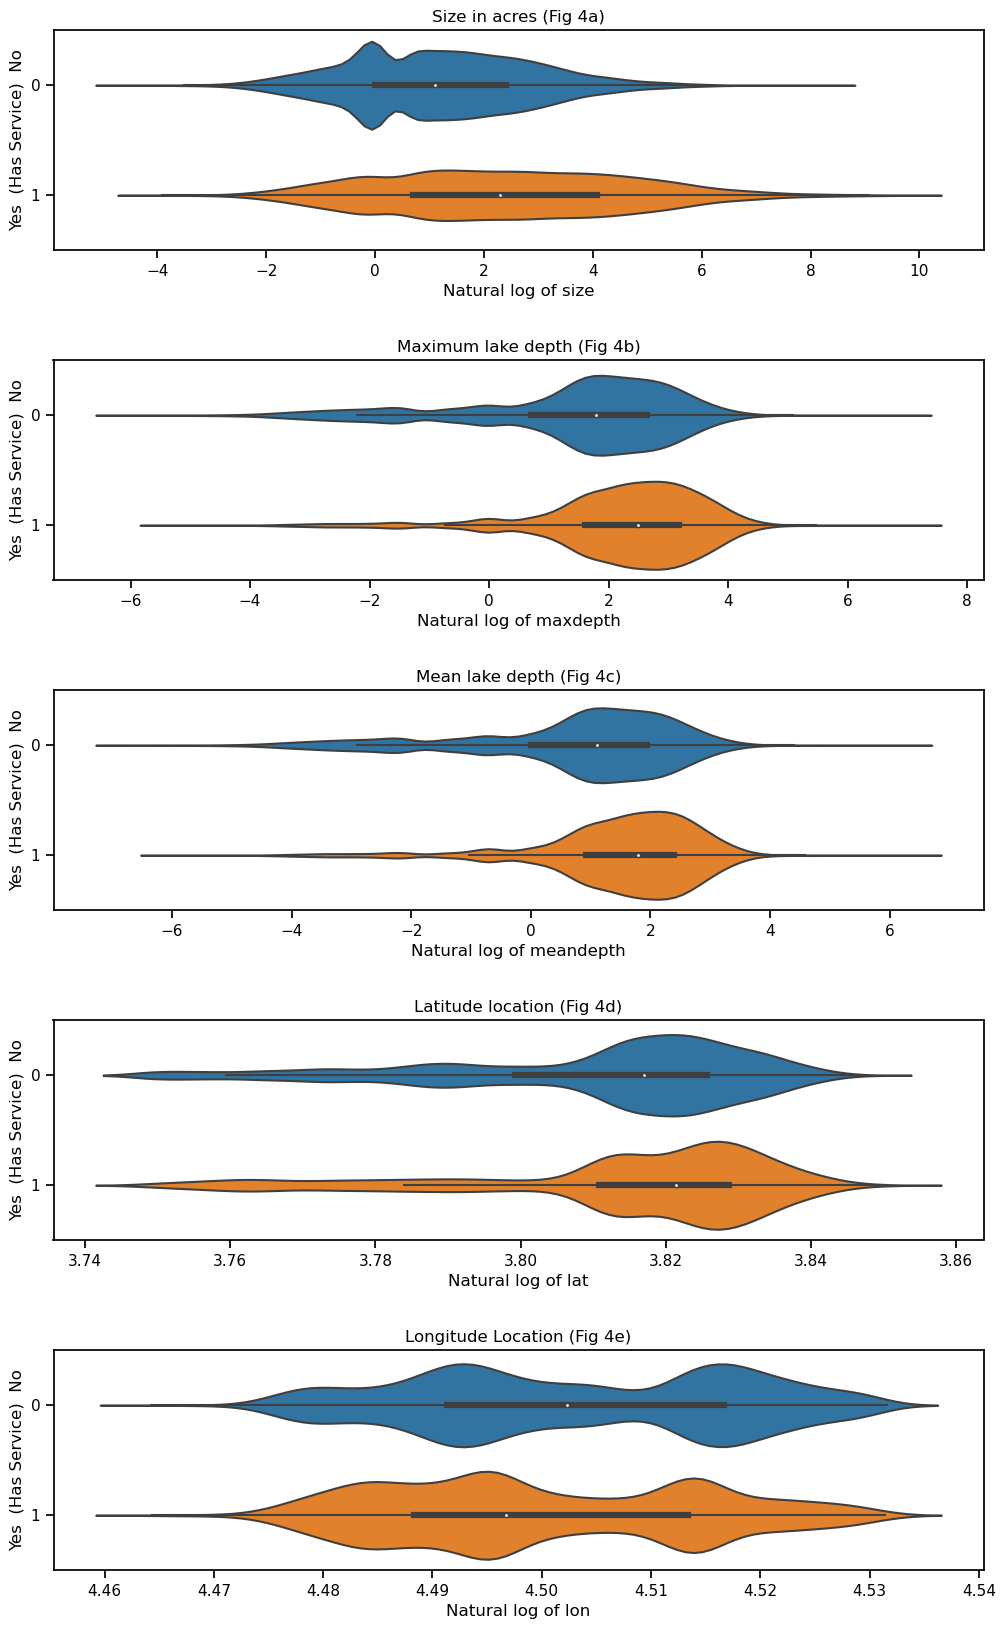

In [14]:
#| label: fig-violin-plot
#| fig-cap: "Violin plots exploring how the presence of services differentiate by continuous variables from the WDNR data."
#| fig-num: true

# Create a grid of subplots
fig, axes = plt.subplots(
    figsize=(12, 20),
    ncols=1, nrows=5,
    squeeze=False)

axes = axes.flatten() if isinstance(axes, np.ndarray) else [axes]

# Adjust the spacing between the subplots
plt.subplots_adjust(hspace=0.5, wspace=0.3)

# Tuple list of var names and titles
variables = [
    ('size', 'Size in acres'),
    ('maxdepth', 'Maximum lake depth'),
    ('meandepth', 'Mean lake depth'),
    ('lat', 'Latitude location'),
    ('lon', 'Longitude Location')
]

# Iterate through list of variables and titles
for i, (var, title) in enumerate(variables):
    sns.violinplot(data=df, x=np.log(np.abs(df[var])), 
                   y='hasservice', orient='h', 
                   ax=axes[i])
    axes[i].set_title(f'{title} (Fig 4{"abcde"[i]})')
    axes[i].set_xlabel(f'Natural log of {var}')
    axes[i].set_ylabel(f'Yes  (Has Service)  No')


Specifically lake size, maximum depth, and mean depth, the top three plots in @fig-violin-plot show differences between lakes that do and do not have public services. In each of these cases, lakes with services (in orange) tend to be shifted to the right along the x-axis, meaning they are generally larger and deeper than lakes without services (in blue). Not only are the central tendencies higher for lakes with services, but the spread of values is also wider, particularly for size, suggesting a greater diversity in lake sizes among serviced lakes. These differences imply that lake size and depth may be strong predictors for whether a lake has public services.

On latitude and longitude, the bottom two plots of @fig-violin-plot, show less pronounced differences. There is modest separation in the distributions for lakes with and without services, particularly in latitude, where lakes with public services appear to be slightly more concentrated in certain geographic bands. This may reflect regional planning priorities or population density factors but likely provides less predictive value than physical lake characteristics.

::: {.callout-note}
The continuous variables displayed in Figure 4 have long-tailed, highly-skewed distributions. To make the visualizations more interpretable and to reduce the influence of extreme values, I applied the natural logarithm transformation. This common transformation compresses the scale of larger values. The result is a more readable distribution.
:::

These visual explorations serve as an important visual check on the potential predictive power of each feature when modeling the presence of public service. The greater the separation between the two distributions, the more likely that variable will be useful in a classification task. Based on the WDNR data, features like size, max depth, and mean depth appear to have strong potential as predictors, while latitude and longitude may contribute some additional nuance when combined with other variables.

One additional customary plot used in exploratory data anlysis is the pair plot. Below @fig-logpairplot_1 again reveals the same patterns noted above in @tbl-prepared-summary and @fig-violin-plot.

/Users/adamrossnelson/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/adamrossnelson/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/adamrossnelson/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


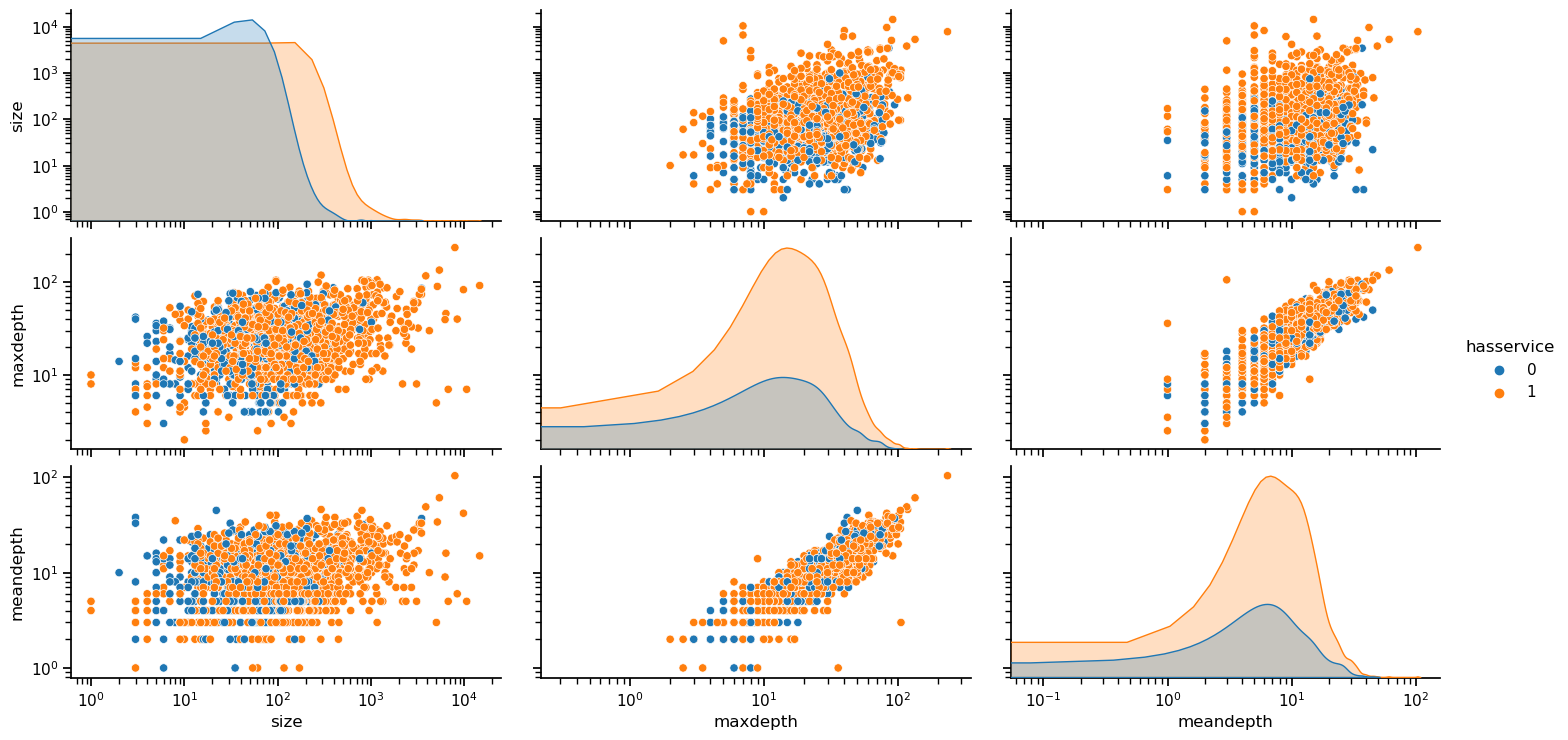

In [15]:
#| label: fig-logpairplot_1
#| fig-cap: "A Traditional Pairplot."
#| fig-num: true

# Produce a filtered pairplot excluding observations that had missing max depth
log_pairplot = sns.pairplot(
    df[(df['maxdepth_missing'] != True) & (df['meandepth_missing'] != True)]
    [['size','maxdepth','meandepth','hasservice']],
    hue='hasservice', aspect=2)

for ax in log_pairplot.axes.flatten():  # Iterate over all subplots
    ax.set_xscale('log')
    ax.set_yscale('log');

## Binary Variable Exploration

These WDNR data also consist of multiple columns of a binary nature, reporting the presence of specific fish species including catfish, largemouth bass, musky, northern pike, panfish, smallmouth bass, sturgeon, trout, and walleye. Instead of exploring the potential predictive value of these binary with violin plots we must turn to other options such as chi square analysis which is well suited to test the whether the presence of a publice service may be a function of the presence of any given species.

In [16]:
# List of binary fish species columns
fish_cols = [
    'Catfish', 'Largemouth Bass', 'Musky',
    'Northern Pike', 'Panfish', 'Smallmouth Bass',
    'Sturgeon', 'Trout', 'Walleye']

# Establish an empty results dictionary
chi2_stats = {}

# Loop through fish columns and compute Chi-square stat vs. hasservice
for col in fish_cols:
    contingency_table = pd.crosstab(df[col], df['hasservice'])
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
    chi2_stats[col] = [chi2_stat, p_value, dof, expected]

# Initilize the beginning of a discussion
chi2_summary = "All fish species columns appear to offer some predictive value. "

# Generate and populate discussion with results from the analysis
for i, (species, stats) in list(enumerate(chi2_stats.items()))[:-1]:
    #print(f"{species}: χ² = {stats[0]:.3f} (p-value = {stats[1]:.4f)")
    chi2_summary += f"""For {species.lower()} we find the χ² value of 
        {stats[0]:.3f} (p-value = {stats[1]:.4f}). """

# Write the last entry of the iterative discussion
chi2_summary += f"""And finally for {species} we 
        find the we find the χ² value of 
        {stats[0]:.3f} (p-value = {stats[1]:.4f})."""

# Display the discussion
display(Markdown(chi2_summary))

All fish species columns appear to offer some predictive value. For catfish we find the χ² value of 
        70.197 (p-value = 0.0000). For largemouth bass we find the χ² value of 
        1370.317 (p-value = 0.0000). For musky we find the χ² value of 
        579.412 (p-value = 0.0000). For northern pike we find the χ² value of 
        1269.510 (p-value = 0.0000). For panfish we find the χ² value of 
        1314.865 (p-value = 0.0000). For smallmouth bass we find the χ² value of 
        504.343 (p-value = 0.0000). For sturgeon we find the χ² value of 
        67.221 (p-value = 0.0000). For trout we find the χ² value of 
        197.378 (p-value = 0.0000). And finally for Trout we 
        find the we find the χ² value of 
        197.378 (p-value = 0.0000).

## Machine Learning Predictions As Recommendations

In [17]:
#| echo: false

with open('_variables.yml', 'a') as  f:
    # Save list of lake types values
    f.write(f'lake_type_vals: {", ".join([i for i in df["type"].unique()]).lower()}\n')
    # Save list of lake clarity values
    f.write(f'lake_clarity_vals: {", ".join([i for i in df["clarity"].unique()]).lower()}\n')
    # Save fish species list for later reference
    f.write(f'fish_species_list: {", ".join([i.lower() for i in fish_cols])}\n')


@james2023introduction explain that "broadly speaking, supervised statistical learning involves building a statistical model for predicting, or estimating, an output based on one or more inputs" (p. 1). Data science methods genreally aim to leverage a series of features which can reliably predict an outcome. 

In this paper's analysis the outcome is whether a lake has as public service while the predictors are each lake's size in acers, maximum depth, mean depth, latitude, longitude, type ({{< var lake_type_vals >}}), clarity ({{< var lake_clarity_vals >}}), and the presence of specific fish species ({{< var fish_species_list >}}).

Through the use of a predictive algorithm that measures similarity this paper's analysis will first create a model that looks to predict which of Wisconsin's lakes have a public service and which of Wisconsin's lakes do not have a public service. Inevitably there will be some errors.

One set of errors will be lakes that do not have a service but that the model predicted would (becauase they are similar to others that do) which we will call overserviced. Likewise another set of errors will be lakes that do have a service but that model predicted would not (becuase these other lakes are more similar to those that do not have service) which we will call underserviced.

## k-Nearest Neighbors (KNN)

To classify whether a lake should or should not have a public service, this paper turns to a classic algorithm known as k-Nearest Neighbors (KNN). More traditionally, this algorithm serves to predict class membership based on an observation's similarity to other observations of a known classification.

KNN is a non-parametric, instance-based learning algorithm that does not make assumptions about the underlying distribution of the data. Instead, it classifies instances based on the majority class of their closest neighbors in a feature space. Which is a technical manner of explaining that KNN is a way for a computer algorithm to make predictions or conclusions about an object based on what it "sees" (or measures using euclidian distances) as other similar objects. 

A simplified version of the KNN process, as it operates for this paper, is to first observe an unknown lake and its characteristic features. Suppose the unknown lake is less than one acre in surface area and also less than 6 feet deep at its max. Then further suppose that 99% of all lakes less than an acre in size and also around 6 feet deep (+/- one foot) have no public service. Thus it would appear that the unknown lake is similar to lakes with no service and accordingly the algorithm would predict the uknown lake as one that also would have no public services.

In data science we use the term *non-parametric* to describe predictive algorithms, such as KNN, which have no fixed formula. Being absent a fixed formula distinguishes the non-parametic approach from parametric approaches, such as logistic regression, for example. @james2023introduction describe KNN as one of "the simplest and best-known non-parametric methods" (p. 111).

Models that are *instance-based* make decisions by comparing one instance (or given this paper's data any instance of a given lake) to others instances (other lakes). During the model fit procedure the algorithm memorizes the training data by storing as a reference all training instances. A *feature space* is a term for the way we describe the multi-dimensional, or multi-variate, nature of the predictive features and their values.

::: {.callout-note}
This distance metric must not be conflated for geographic distance. For example, two lakes located on opposite sides of the state may still be considered "close" in feature space if they share similar size, depth, water clarity, and fish populations. This abstract notion of distance allows KNN to make predictions based on overall similarity in characteristics, rather than geographic location alone.
:::

In this paper's data, the feature space includes dimensions such as lake size, maximum depth, mean depth, latitude, longitude, water clarity, and the presence of specific fish species. The KNN algorithm uses this feature space to calculate distances between lakes and identify their nearest neighbors, which helps classify them based on their similarity.

# Analysis

This analysis uses the open-source Python package Scikit-learn (https://scikit-learn.org), a widely adopted and well-documented framework for implementing machine learning models, including k-nearest neighbors (KNN). Scikit-learn supports reproducible and transparent research, making it ideal for applications in data science and policy evaluation.

**TODO: Add Sklearn documenation as a source.**

The analytical procedures in this paper align with those outlined in Chapter 11 of @nelson2023confident and Chapter 3 of @raschka2019python. Most machine learning workflows begin by splitting the available data into training and testing sets. The training set allows the model to learn patterns and relationships in the data, while the testing set remains untouched until final evaluation. This split helps ensure that performance estimates reflect how the model will generalize to new data not seen during training.

The training and testing sets also support model parameter selection. In this case the parameter to optimize is the optimal number of *k* neighbors in the KNN algorithm. As is also customary, to avoid information leakage, this analysis performs data preprocessing after the data has been split. Binary features (such as fish species presence) require no further transformation. However, nominal features such as clarity and type are converted into dummy variables using one-hot encoding, and all continuous predictors are rescaled using a standardization procedure to ensure they contribute equally to distance calculations.

Following transformation, the next step involves conducting a parameter search to identify the most effective value for *k*, the number of nearest neighbors used in the KNN algorithm. In most cases, the customary approach is to select the smallest value of *k* that also minimizes prediction error. A smaller *k* yields a simpler, more interpretable model. However, this paper intentionally selects a less-well performing k value to relize a more complex model. The reasoning behind this choice is practical: a more complex model yields a finer-grained and more complete distribution of predicted probabilities. These probabilities in turn, support a more nuanced analysis of false predictions. As the anslysis seeks to identify lakes that do not have public services but appear similar to those that do, and vice versa. This added granularity enhances the utility of the model in producing actionable policy recommendations.

As a final step, this analysis uses a two-fold cross-validation with symmetric evaluation, which ensures that every lake is evaluated as an out-of-sample observation exactly once. In the first fold, the model is trained on half of the data and used to predict outcomes for the other half; in the second fold, the roles are reversed. This method yields a complete set of out-of-sample predictions, which allows us to identify false positives (lakes without public services that resemble lakes that do) and false negatives (lakes with public services that resemble those that don’t). These classification errors serve as the empirical foundation for the policy recommendations presented later in this paper.

## Train Test Split Procedure

The SciKit Learn user guide states plainly that "Learning the parameters of a prediction function and testing it on the same data is a methodological mistake" @scikit-learn-cross-validation2023. This mistake would usually lead to a model that has *overfit*. Instead of finding the general functional relationships between predictor features and an outcome, a model that has overfit to the data, has come close to memorizing the training data.

By first fitting a model on a subset of training data and then using a separate hold out subset as a test, the procedure results in a more objective opportunity to fairly evaluate the predictive abilities of a model. The procedure ensures that a model which performs well on training data also later performs well on new data yet to be generated in future production settings.

In [18]:
# Organize Features + Predictors
ready_features = [
    'Catfish','Largemouth Bass', 'Musky', 'Northern Pike', 
    'Panfish', 'Smallmouth Bass', 'Sturgeon', 'Trout', 'Walleye']
con_features = ['size','maxdepth', 'meandepth', 'lat', 'lon']
bin_features = ['maxdepth_missing', 'meandepth_missing']
cat_features = ['type', 'clarity']

# Establish X (predictor) and y (target) matricies
X = df[con_features + bin_features + ready_features + cat_features]
y = df['hasservice']

# Perform train test split with SkLearn
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y)

## Rescale Continuous Data

According to @raschka2019python "the majority of machine learning... algorithms behave much better if features are on the same scale" (p. 124). In the case of KNN, an algorithm that relies on calculating distances between data points in the feature space, if the features spread across vastly different scales, those with larger ranges will dominate the distance calculations. 

Fitting a KNN on features that are differently scaled may potentially lead to biased classifications. For instance, if one feature represents lake size in acres (ranging from tens to thousands) and another represents water clarity on a scale of 1 to 100, the size feature will disproportionately influence the nearest neighbor determination. Thus, For KNN, rescaling ensures that all features contribute equally to the distance metric [@nelson2023confident, p. 317].

To address this issue, continuous data is typically rescaled to 0 to 1, -1 to 1, or to z-score values which places the mean at 0 and then shifts values so there is a standard deviation of 1. In this paper I proceed with a 0 to 1 scale.

In [19]:
scaler = StandardScaler()
ohe = OneHotEncoder(sparse_output=False, 
                    handle_unknown='ignore').set_output(transform='pandas')

# Rescale continuous variables
X_train[con_features] = scaler.fit_transform(X_train[con_features])
X_test[con_features] = scaler.transform(X_test[con_features])

# One hot encode nominal categorical
X_train_ohe = ohe.fit_transform(X_train[cat_features])
X_test_ohe = ohe.transform(X_test[cat_features])

# Drop original categorical cols and concat OHE output
X_train = pd.concat([X_train.drop(cat_features, axis=1), X_train_ohe], axis=1)
X_test = pd.concat([X_test.drop(cat_features, axis=1), X_test_ohe], axis=1)

In [20]:
#| echo: false
#| output: false

# Inspect results of X_train
X_train.sample(3)

,size,maxdepth,meandepth,lat,lon,maxdepth_missing,meandepth_missing,Catfish,Largemouth Bass,Musky,...,type_DRAINAGE,type_DRAINED,type_Missing,type_SEEPAGE,type_SPRING,clarity_Low,clarity_Missing,clarity_Moderate,clarity_Very Clear,clarity_Very Low
12409,-0.139615,-0.482627,-0.473010,1.055965,0.358330,1,1,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2597,-0.124105,-0.077122,-0.058489,-1.063808,0.584610,0,1,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
16238,-0.046154,-0.077122,-0.058489,-1.055787,-0.192559,0,1,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [21]:
#| echo: false
#| output: false

# Inspect results of X_test
X_test.sample(3)

,size,maxdepth,meandepth,lat,lon,maxdepth_missing,meandepth_missing,Catfish,Largemouth Bass,Musky,...,type_DRAINAGE,type_DRAINED,type_Missing,type_SEEPAGE,type_SPRING,clarity_Low,clarity_Missing,clarity_Moderate,clarity_Very Clear,clarity_Very Low
407,-0.075722,0.034024,0.055128,0.174901,0.042616,0,1,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
12992,-0.134857,-0.299413,-0.285722,0.461754,-1.014251,0,1,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
16165,-0.139722,-0.482980,-0.473371,1.055390,0.363014,1,1,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## Fit Base Model

Before proceeding with parameter tuning or model refinement, it is often useful to fit a base model using an arbitrary but reasonable choice of parameters. In the case of k-nearest neighbors (KNN), selecting a base *k* such as *k* = 19. This base model provides an initial benchmark for model performance. This step, though technically optional, serves several important purposes within the broader analytical process.

First, fitting a base model allows the analyst to ensure that the pipeline—from data preprocessing to model training and evaluation functioned as intended. Errors related to data structure, scaling, encoding, or other preprocessing steps often surface during this preliminary fit. The base model thus acts as a diagnostic opportunity to detect problems before introducing additional complexity through cross-validation, parameter searches, or other hyperparameter tuning efforts.

Second, the base model offers a reference point for evaluating the value added by subsequent modeling decisions. For example, if the accuracy or error rate of a tuned model differs only marginally from that of the base model, the analyst may reconsider the complexity or interpretability trade-offs involved in optimization. Conversely, large improvements over the base model suggest meaningful gains that justify further refinement.

Finally, the base model supports replication and transparency by providing a fixed and reproducible result that others can use to validate or extend the work. By producing and recording model performance with arbitrary but documented parameters, the analysis builds a foundation upon which subsequent results can be compared, especially in applied contexts where interpretability and policy implications matter as much as technical performance.

In short, while fitting a base model with arbitrary *k* is not strictly necessary for most analyses, it offers extensive practical value in building a rigorous, transparent, and well-structured analysis.

In [22]:
# Instantiate a base model with 19 neighbors
knn_base = KNeighborsClassifier(n_neighbors=19)

# Fit the model using training data
knn_base.fit(X_train, y_train)
y_pred = knn_base.predict(X_test)


In [23]:
#| echo: false
#| output: false

with open('_variables.yml', 'a') as f:
    # Assess model accuracy
    f.write(f'base_accuracy: {(y_pred == y_test).mean()}\n')
    # Count false positives
    f.write(f'base_false_pos: {((y_pred == 1) & (y_test == 0)).sum()}\n')
    # Count false negatives
    f.write(f'base_false_neg: {((y_pred == 0) & (y_test == 1)).sum()}\n')


This base model yeild {{< var base_accuracy >}} accuracy (correct classifications). There were {{< var base_false_pos >}} false positive predictions and {{< var base_false_neg >}} false negative predictions. These base metrics can serve as a helpful reference when evaluating futher results below.

## Evaluate + Search for Optimal K

This portion of the analysis implements a parameter search to determine how the choice of *k* (the number of neighbors considered in the KNN classification algorithm) affects model performance. The goal is to identify a value of *k* that yields relatively low classification error, thereby improving the model’s predictive accuracy. As discussed above, for this paper I will not choose the lowest error rate in order to support a fully nuanced analysis.

This portion of the analysis begins by initializing an empty list named `error_rates` to store the error rate associated with each value of *k*. The `for` loop then iterates through odd-numbered values of *k* from 1 to 99. Odd values avoid tie votes in binary classification. For each iteration, the code instantiates a new `KNeighborsClassifier` model using the current value of *k* and fits it to the training data.

Once trained the code predicts classifications for the testing set (`X_test`), then calculates the error rate as the proportion of incorrect predictions, and appends that result to the `error_rates` list. By the end of the loop, the list holds the model's error rates across a range of *k* values.

In [24]:
# Instantiate an empty list of errors
error_rates = []

# Iterate through odd numbered neighbors 1 through 99
for k in range(1, 100, 2):
    # The KNN classification model
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Generate predictions on the testing data
    y_pred_kn = knn.predict(X_test)
    
    # Calculate and record proprtion of correct classifications
    error_rates.append(np.mean(y_pred_kn != y_test))

A subsequent block of code generates @fig-error_rates, a visual representation of the results using Matplotlib. @fig-error_rates uses a dotted blue line with ‘x’ markers to show how error rates change as *k* increases.

By examining @fig-error_rates's curve, an analyst can make an informed decision about which *k* values to consider for the final model—balancing error rate, model simplicity, and practical interpretability. Given these results I choose a *k* value of 29 consistent with the procedure outlined above.

Text(0, 0.5, 'Error Rate')

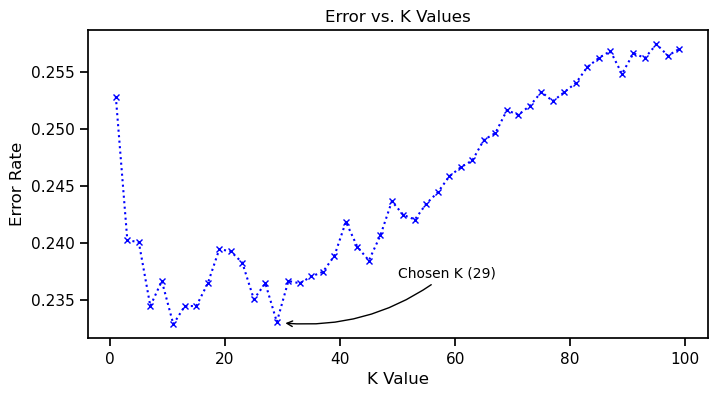

In [25]:
#| label: fig-error_rates
#| fig-cap: "A plot showing error rate over a range of k values."
#| fig-num: true

# Visualize the results of the search above
plt.figure(figsize=(8, 4))           # Landscape Sizing

# Match plot range to for loop above - add style for readability
plt.plot(range(1, 100, 2), error_rates, color='blue',
         linestyle=':', marker='x', markersize=5)

plt.annotate(text='Chosen K (29)', 
             xy=(30, .233), xytext=(50, .237), fontsize=10,
             arrowprops={'arrowstyle':'->', 'connectionstyle':'arc3, rad=-.2'})

plt.title('Error vs. K Values')      # Chart Title
plt.xlabel('K Value')                # X Axis Title
plt.ylabel('Error Rate')             # Y Axis Title

## Two-fold cross-validation; Symmetric evaluation

In executing this procedure I first split the data into two equal halves. In the first fold, I train the model on the first half and predict on the second; in the second fold, the I reverse the process.

As before, within each fold, continuous variables are standardized using `StandardScaler` and nominal categorical variables are transformed via one-hot encoding using `OneHotEncoder`.

After each fit, train, and predict I record both the prediction and also the probability of membership in the `hasservice` class. Finally, I combine predictions from both folds and merged them back into the original data. The result is a full set of out-of-sample predictions and prediction probabilities for each observation.

In [26]:
# Establish X (predictor) and y (target) matricies
X = df[con_features + bin_features + ready_features + cat_features]
y = df['hasservice']

# # Perform initial 50/50 split
X_A, X_B, y_A, y_B = train_test_split(
    X, y, test_size=0.5, random_state=42, stratify=y)

def execute_fold(X_train, X_test, y_train, y_test):
    scaler = StandardScaler()
    ohe = OneHotEncoder(sparse_output=False, 
                        handle_unknown='ignore').set_output(transform='pandas')

    # Rescale continuous variables
    X_train[con_features] = scaler.fit_transform(X_train[con_features])
    X_test[con_features] = scaler.transform(X_test[con_features])

    # One hot encode nominal categorical
    X_train_ohe = ohe.fit_transform(X_train[cat_features])
    X_test_ohe = ohe.transform(X_test[cat_features])

    # Drop original categorical cols and concat OHE output
    X_train = pd.concat([X_train.drop(cat_features, axis=1), X_train_ohe], axis=1)
    X_test = pd.concat([X_test.drop(cat_features, axis=1), X_test_ohe], axis=1)
    
    # Instantiate KNN Model
    knn_cross = KNeighborsClassifier(n_neighbors=29)

    # Fit the model using training data
    knn_cross.fit(X_train, y_train)
    return pd.DataFrame({
        'predicted': knn_cross.predict(X_test),
        'probability': knn_cross.predict_proba(X_test)[: ,1]},
        index=X_test.index)

# Train on A, predict on B
y_B_pred = execute_fold(X_A, X_B, y_A, y_B)

# Train on B, predict on A
y_A_pred = execute_fold(X_B, X_A, y_B, y_A)

# Stack the predictions
y_preds = pd.concat([y_B_pred, y_A_pred])

# Recompile the full data set
output_cols = ['ID', 'name', 'size', 'maxdepth', 'meandepth', 
       'lat', 'lon', 'hasservice', 'haslanding', 'hasbeach', 
       'haspark', 'type', 'clarity', 'county']

output_data = df[output_cols].copy()

output_data = output_data.merge(
    y_preds, left_index=True, right_index=True, 
    validate='one_to_one')

# Save output_data to csv
output_data.to_csv('output_data.csv', index=True)

In [27]:
#| echo: false
#| output: false

# Check the results
output_data.sample(3)

,ID,name,size,maxdepth,meandepth,lat,lon,hasservice,haslanding,hasbeach,haspark,type,clarity,county,predicted,probability
6316,358900,Un Spring,0.38,0.09048,0.04524,45.072139,-88.753861,0,0,0,0,Missing,Missing,Menominee,0,0.103448
11929,2039500,Unnamed,0.27,7.00000,3.50000,46.291512,-89.934271,0,0,0,0,Missing,Missing,Iron,0,0.172414
13650,1079000,Unnamed,0.81,11.00000,5.50000,45.400829,-89.556818,0,0,0,0,Missing,Missing,Lincoln,0,0.172414


# Results

This analysis produced {{< var false_preds_count >}} false predictions. A full list of all the lakes analyzed in this study and the predictive results accompanies this project in a file called `output_data.csv`. 

In [28]:
# Summarise results, count false predictions
false_preds_count = sum(output_data['hasservice'] != output_data['predicted'])

# Filter for false positives
false_positives = output_data[
    (output_data['hasservice'] == 0) & 
    (output_data['predicted'] == 1)]

# Save count of false positives
false_positive_count = false_positives.shape[0]

# Filter for false negatives
false_negatives = output_data[
    (output_data['hasservice'] == 1) & 
    (output_data['predicted'] == 0)]

# Save count of false negatives
false_negative_count = false_negatives.shape[0]

# Save these data for later reference
with open("_variables.yml", "a") as f:
    f.write(f"false_preds_count: {false_preds_count}\n")
    f.write(f"false_positive_count: {false_positive_count}\n")
    f.write(f"false_negative_count: {false_negative_count}\n")

In [29]:
# Initiate paragraph describing false positive results
false_pos_desc = f"Overall there were {false_positive_count} false positives. "
false_pos_desc += "Among the false positives there were "

# Write paragraph describing false positive results
for p, lcount in list(
    false_positives['probability'].value_counts().sort_index().to_dict().items())[:-1]:
    false_pos_desc += f"{lcount} lakes with a {p:.2f} probability of having service, "

# Add last clause with special handeling
p, lcount = list(
    false_positives['probability'].value_counts().sort_index().to_dict().items())[-1]
false_pos_desc += f"and in the last probability level there were {lcount} lakes "
false_pos_desc += f"with a {p:.2f} probability of having service."

# Initiate paragraph describing false negative results
false_neg_desc = f"This analysis yielded {false_negative_count} false negatives. "
false_neg_desc += "Among the false negatives there were "

# Write paragraph describing false negative results
for p, lcount in list(
    false_negatives['probability'].value_counts().sort_index().to_dict().items())[:-1]:
    false_neg_desc += f"{lcount} lakes with a {p:.2f} probability of having service, "

# Add last clause with special handeling
p, lcount = list(
    false_negatives['probability'].value_counts().sort_index().to_dict().items())[-1]
false_neg_desc += f"and lastly there were {lcount} lakes "
false_neg_desc += f"with a {p:.2f} probability of having service."

# Display paragraph regarding false positives
display(Markdown(false_pos_desc))

# Display paragraph regarding false negatives
display(Markdown(false_neg_desc))

Overall there were 1237 false positives. Among the false positives there were 297 lakes with a 0.52 probability of having service, 254 lakes with a 0.55 probability of having service, 200 lakes with a 0.59 probability of having service, 128 lakes with a 0.62 probability of having service, 117 lakes with a 0.66 probability of having service, 96 lakes with a 0.69 probability of having service, 51 lakes with a 0.72 probability of having service, 44 lakes with a 0.76 probability of having service, 22 lakes with a 0.79 probability of having service, 14 lakes with a 0.83 probability of having service, 4 lakes with a 0.86 probability of having service, 2 lakes with a 0.90 probability of having service, 4 lakes with a 0.93 probability of having service, 2 lakes with a 0.97 probability of having service, and in the last probability level there were 2 lakes with a 1.00 probability of having service.

This analysis yielded 2979 false negatives. Among the false negatives there were 21 lakes with a 0.00 probability of having service, 82 lakes with a 0.03 probability of having service, 121 lakes with a 0.07 probability of having service, 121 lakes with a 0.10 probability of having service, 144 lakes with a 0.14 probability of having service, 187 lakes with a 0.17 probability of having service, 175 lakes with a 0.21 probability of having service, 177 lakes with a 0.24 probability of having service, 179 lakes with a 0.28 probability of having service, 229 lakes with a 0.31 probability of having service, 275 lakes with a 0.34 probability of having service, 325 lakes with a 0.38 probability of having service, 292 lakes with a 0.41 probability of having service, 334 lakes with a 0.45 probability of having service, and lastly there were 317 lakes with a 0.48 probability of having service.

## Underserved Lakes

Underserved lakes are the lakes that this analysis falsely predicted not to have services, but that actually do have services. Because the results produced {{< var false_positive_count >}} false positives I further refine the definition of underserved lakes to include those that had a probability of service greater than .80. @tbl-overserviced-lakes provides a full list of underserviced lakes.


In [30]:
#| label: tbl-underserviced-lakes
#| tbl-cap: "A list of underservied lakes (false positives)."
#| tbl-num: true

false_positives[false_positives['probability'] > .8][
    ['name','size','lat','lon','county','probability']]

,name,size,lat,lon,county,probability
153,Balmoral Pond,59.00,43.226486,-90.470669,Richland,0.862069
814,Callahan Lake,138.00,45.989217,-91.239951,Sawyer,0.862069
1682,Fence Lake,3483.00,45.950856,-89.839401,Vilas,0.965517
2635,Kettle Moraine Lake,209.00,43.653256,-88.210314,Fond du Lac,0.931034
2645,Kilbourn Flowage,1868.00,43.671867,-89.800722,"Juneau, Adams",1.000000
2887,Lake Placid,178.00,46.026224,-91.281368,Sawyer,0.862069
3002,Lee Lake,30.00,44.187680,-90.647376,Jackson,0.827586
3298,Little Yellow Lake,332.00,45.929222,-92.430777,Burnett,0.931034
3679,McClaine Lake,53.00,46.061263,-91.296472,Sawyer,0.827586
3899,Moon Lake,131.00,45.917882,-89.434357,Vilas,0.827586


@tbl-underserviced-lakes presents a list of lakes identified by KNN model as false positives, or as lakes that were predicted to have public services but do not currently offer them. Each row includes the lake's name, its surface area in acres (`size`), geographic coordinates (`lat` and `lon`), the county or counties in which the lake is located, and the model's estimated `probability`. 

This `probability` value is a key element in the table: it represents the proportion of the 29 nearest neighbors (as set by the optimal *k* in the model) that do have a public service. For example, a probability of `0.827586` implies that 25 out of 29 neighboring lakes in the feature space had a public service, making the model highly confident that the lake in question should as well.

Lakes such as Kilbourn Flowage, Kettle Moraine Lake, and Fence Lake have especially high probabilities—approaching or reaching 1.0—indicating that all of their most similar lakes in the multi-dimensional feature space do have services. These high-probability false positives are particularly important because they suggest a strong pattern of similarity when compared to serviced lakes and thus may warrant prioritization for future investments in public amenities.

## Overserviced Lakes

The opposite of underserved lakes, overserviced lakes are those that the model suggested would not have services but do (the false negatives). With {{< var false_negative_count >}} false negatives it is also convenient to refine this definition. To reduce the number of lakes for consideration as overserviced I further refine the definition of overserviced lakes to only include those that had a probability of service less than .03. @tbl-underserviced-lakes provides a full list of these overserviced lakes.


In [31]:
#| label: tbl-overserviced-lakes
#| tbl-cap: "A list of overserviced lakes (false positives)."
#| tbl-num: true

false_negatives[false_negatives['probability'] < .03][
    ['name','size','lat','lon','county','probability']]

,name,size,lat,lon,county,probability
927,Ceylon Lagoon,6.00,42.569558,-88.436106,Walworth,0.0
1797,Fountain City Bay,12.00,44.159725,-91.777910,Buffalo,0.0
6511,Un Spring,2.00,44.590719,-89.275868,Portage,0.0
6726,Un Spring,0.43,45.393054,-89.142821,Langlade,0.0
7085,Unnamed,0.16,45.353973,-87.835161,NaN,0.0
8064,Unnamed,15.00,45.423579,-87.846604,NaN,0.0
8389,Unnamed,6.00,44.775488,-89.371965,Marathon,0.0
8390,Unnamed,11.00,44.775369,-89.363338,Marathon,0.0
9414,Unnamed,6.00,45.590046,-92.411616,Polk,0.0
9449,Unnamed,5.00,45.695333,-91.798330,Washburn,0.0


@tbl-overserviced-lakes identifies lakes classified as false negatives by the KNN model. These lakes do have public services, but the model predicted they would not. In this analysis, such lakes are referred to as overserviced, meaning they are dissimilar—based on the features available—to most other lakes that also have services.

As was also with @tbl-underserviced-lakes this `probability` column reflects the proportion of the 29 most similar lakes (i.e., nearest neighbors in the multi-dimensional feature space) that had public services. A `probability` of 0.0 implies that none of the 29 neighbors had a service.

For example, Fountain City Bay and Ceylon Lagoon offer public services but are quite like at least 29 other unserviced lakes. Ultimately, @tbl-overserviced-lakes and @tbl-underserviced-lakes provide a data-driven starting point for reevaluating the current distribution of public services across Wisconsin’s lakes by identifying outliers that may represent opportunities for improved alignment with service needs. Whiel @fig-knn-false-predictions shows the location of these underserviced and overserviced lakes.

/var/folders/jj/4qs20y6s0yx9y1p0037cpb280000gn/T/ipykernel_35516/1122970635.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  false_pos_strong['Error Type'] = "False + Underserved"
/var/folders/jj/4qs20y6s0yx9y1p0037cpb280000gn/T/ipykernel_35516/1122970635.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  false_neg_strong['Error Type'] = "False - Overserviced"


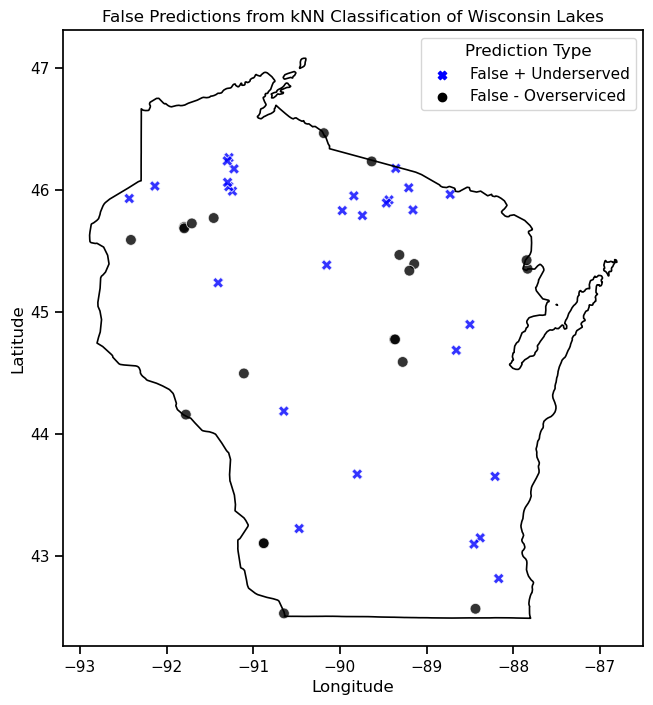

In [32]:
#| label: fig-knn-false-predictions
#| fig-cap: "False positive and false negative predictions from the kNN model mapped onto the state of Wisconsin."
#| fig-num: true

# Load Wisconsin outline
wisconsin = fetch_wisconsin_geojson()

# Filter to subset of false predicitons
false_pos_strong = false_positives[false_positives['probability'] > .80]
false_neg_strong = false_negatives[false_negatives['probability'] < .03]

# Add error type labels
false_pos_strong['Error Type'] = "False + Underserved"
false_neg_strong['Error Type'] = "False - Overserviced"

# Combine for plotting
map_df = pd.concat([false_pos_strong, false_neg_strong], ignore_index=True)

# Convert to GeoDataFrame
gdf_map = gpd.GeoDataFrame(
    map_df,
    geometry=gpd.points_from_xy(map_df['lon'], map_df['lat']),
    crs="EPSG:4326"
)

# Plotting
fig, ax = plt.subplots(figsize=(10, 8))

# Plot state boundary
wisconsin.boundary.plot(ax=ax, color='black', linewidth=1.2)

# Plot predictions
sns.scatterplot(
    data=gdf_map,
    x='lon', y='lat',
    hue='Error Type', style='Error Type',
    palette={'False + Underserved': 'blue', 'False - Overserviced': 'black'},
    markers={'False + Underserved': 'X', 'False - Overserviced': 'o'},
    s=60, ax=ax, alpha=0.8
)

# Set titles and labels
ax.set_title("False Predictions from kNN Classification of Wisconsin Lakes")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.legend(title='Prediction Type')


The map in @fig-knn-false-predictions presents a visualization of false predictions generated by the KNN classification model trained to identify which Wisconsin lakes have public services—such as boat landings, beaches, or parks—based. Specifically, it highlights two important categories of interest for policy consideration: underserved lakes and overserviced lakes.

# Further Discussion

Lakes marked with blue "x" symbols represent false positives, or underserved lakes. These underserved lakes are those that the model predicted to have public services, because they are similar to other lakes that do, but that in reality do not have public services. These lakes may warrant further investigation as candidates for the addition of public accommodations.

Conversely, lakes marked with black dots represent false negatives, or overserviced lakes. These overserviced lakes are those where the model predicted no public services should be present but that are currently are serviced with boat landings, beaches, or parks. These may be examples of lakes whose public services might be considered for decommission or retirement.

Both underserved and overserved lakes are widely distributed throughout the state. This spatial analysis offers a critical bridge between predictive modeling and those audiences who may consume this information as they look to make and implement lake management policy. By identifying specific lakes for which the model's prediction diverges from current reality, this map serves as a guide for natural resource managers, planners, and local officials for further review.

## Limitations + Weaknesses

{{< lipsum 3 >}}

## Suggestions For Further Work

{{< lipsum 2 >}}


# Summary + Conclusions

{{< lipsum 4 >}}

# Appendicies

**Mapping Wisconsin’s Shape and Lake Locations**

To generate the maps featured in this analysis, the shape of the state of Wisconsin was retrieved from a public **GeoJSON** file hosted on GitHub. GeoJSON is a geospatial data format based on JSON (JavaScript Object Notation) that stores geographic features such as points, lines, and polygons. In this case, the boundary polygon of Wisconsin serves as the base layer for the map.

The file is read into a **GeoDataFrame** using the `GeoPandas` library (`gpd`). GeoPandas is an extension of Pandas that enables spatial operations and plotting by introducing a `geometry` column capable of storing shapely geometries. A simple function was written to check whether the Wisconsin GeoJSON file already exists locally and, if not, to download and store it from a known remote source.

Lake location data from the Wisconsin Department of Natural Resources (WDNR) was merged with additional columns indicating the presence of public services. Using `gpd.points_from_xy()`, each lake’s longitude and latitude values were converted to a point geometry, and the data were also cast into a GeoDataFrame.

To ensure proper alignment on the map, both the Wisconsin boundary and the lake point geometries were assigned the same **Coordinate Reference System (CRS)**: EPSG:4326, which corresponds to the standard WGS84 system using degrees of latitude and longitude.

- EPSG:4326 refers to a specific coordinate reference system (CRS) that is widely used for geographic data. It is part of a registry maintained by the European Petroleum Survey Group (EPSG), which assigns numeric codes to standard spatial reference systems. EPSG:4326 specifies that coordinates are expressed in degrees of latitude and longitude, based on the WGS84 datum.

- WGS84, or the World Geodetic System 1984, is a global reference system used by GPS and many mapping applications. It defines the shape of the Earth as an ellipsoid and provides a consistent framework for locating points on the Earth's surface. When spatial data is aligned to WGS84, it can be accurately mapped and compared across different datasets and tools, making it a common default in global mapping applications and open geospatial data formats.

Plotting was accomplished using **Matplotlib** and **Seaborn**, with lake points styled according to the presence or absence of public services (e.g., boat landings, beaches, or parks). This overlay provides a spatial perspective that supports both exploratory analysis and the interpretation of model predictions.

# Scratch Space

# References